# 1 Introduction

## 1.1 Overview of the Dataset

This is a car accident dataset for the state of Virginia. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains 303,301 accident records.

**Traffic Attributes**
* ID - This is a unique identifier of the accident record.
* Source - Source of raw accident data.
* Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic and 4 indicates the most impact on traffic.
* Start_Time - Shows start time of the accident in local time zone.
* End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow ends.
* Start_Lat - Shows latitude in GPS coordinate of the start point.
* Start_Lng - Shows longitude in GPS coordinate of the start point.
* End_Lat - Shows latitude in GPS coordinate of the end point.
* End_Lng - Shows longitude in GPS coordinate of the end point.
* Distance(mi) - The length of the road extent affected by the accident in miles.
* Description - Shows a human provided description of the accident.

**Geographical Attributes**
* Street - Shows the street name in address field.
* City - Shows the city in address field.
* County - Shows the county in address field.
* State - Shows the state in address field.
* Zipcode - Shows the zipcode in address field.
* Country - Shows the country in address field.
* Timezone - Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes**
* Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.
* Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).
* Temperature(F) - Shows the temperature (in Fahrenheit).
* Wind_Chill(F) - Shows the wind chill (in Fahrenheit).
* Humidity(%) - Shows the humidity (in percentage).
* Pressure(in) - Shows the air pressure (in inches).
* Visibility(mi) - Shows visibility (in miles).
* Wind_Direction - Shows wind direction.
* Wind_Speed(mph) - Shows wind speed (in miles per hour).
* Precipitation(in) - Shows precipitation amount in inches, if there is any.
* Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**Point of Interest Attributes**
* Amenity - A POI annotation which indicates presence of amenity in a nearby location.
* Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location.
* Crossing - A POI annotation which indicates presence of crossing in a nearby location.
* Give_Way - A POI annotation which indicates presence of give_way in a nearby location.
* Junction - A POI annotation which indicates presence of junction in a nearby location.
* No_Exit - A POI annotation which indicates presence of no_exit in a nearby location.
* Railway - A POI annotation which indicates presence of railway in a nearby location.
* Roundabout - A POI annotation which indicates presence of roundabout in a nearby location.
* Station - A POI annotation which indicates presence of station in a nearby location.
* Stop - A POI annotation which indicates presence of stop in a nearby location.
* Traffic_Calming - A POI annotation which indicates presence of traffic_calming in a nearby location.
* Traffic_Signal - A POI annotation which indicates presence of traffic_signal in a nearby location.
* Turning_Loop - A POI annotation which indicates presence of turning_loop in a nearby location.

**Period of Day Attributes**
* Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.
* Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.
* Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.
* Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

In [1]:
import pandas as pd
import warnings

# Display all rows and columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Ignore all warnings
warnings.filterwarnings('ignore')

# Import the Virginia car crash dataset
# data = pd.read_csv('va-accidents.csv')

filtered_df = pd.DataFrame()

chunksize = 10 ** 6
for chunk in pd.read_csv('US_Accidents_March23.csv', chunksize=chunksize):
    filtered_chunk = chunk[chunk['State'] == 'VA']

    # Append the filtered rows to the filtered_df
    filtered_df = pd.concat([filtered_df, filtered_chunk], ignore_index=True)

data = filtered_df

# Take a quick look at the dataset
display(data.head())
display(data.info())

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-228566,Source2,3,2016-11-30 16:45:09,2016-11-30 17:14:40,38.815727,-77.138252,NaN,NaN,0.01,Right hand shoulder closed due to accident on ...,Duke St,Alexandria,Alexandria,VA,22312,US,US/Eastern,KDCA,2016-11-30 16:52:00,64.0,NaN,90.0,29.69,10.0,South,6.9,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-228570,Source2,3,2016-11-30 17:15:38,2016-11-30 17:45:17,38.954506,-77.193832,NaN,NaN,0.01,Right hand shoulder closed due to accident on ...,Capital Beltway N,Mc Lean,Fairfax County,VA,22101,US,US/Eastern,KDCA,2016-11-30 16:52:00,64.0,NaN,90.0,29.69,10.0,South,6.9,0.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,A-228591,Source2,3,2016-11-30 18:31:42,2016-11-30 19:01:22,39.217541,-78.137474,NaN,NaN,0.01,Right hand shoulder closed due to multi-vehicl...,I-81 N,Winchester,Frederick,VA,22603,US,US/Eastern,KOKV,2016-11-30 18:35:00,53.6,NaN,94.0,29.67,4.0,Calm,NaN,NaN,Light Drizzle,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
3,A-228592,Source2,3,2016-11-30 18:26:51,2016-11-30 18:56:30,38.834152,-77.218185,NaN,NaN,0.01,Right hand shoulder closed due to accident on ...,Capital Beltway S,Annandale,Fairfax County,VA,22003,US,US/Eastern,KDAA,2016-11-30 17:58:00,65.1,NaN,85.0,29.67,10.0,SSE,3.5,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,A-228593,Source2,3,2016-11-30 18:30:23,2016-11-30 19:00:01,38.794235,-77.054161,NaN,NaN,0.01,Right hand shoulder closed due to accident on ...,Capital Beltway W,Alexandria,Alexandria,VA,22314,US,US/Eastern,KDCA,2016-11-30 18:40:00,64.9,NaN,81.0,29.67,10.0,NW,20.7,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303301 entries, 0 to 303300
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     303301 non-null  object 
 1   Source                 303301 non-null  object 
 2   Severity               303301 non-null  int64  
 3   Start_Time             303301 non-null  object 
 4   End_Time               303301 non-null  object 
 5   Start_Lat              303301 non-null  float64
 6   Start_Lng              303301 non-null  float64
 7   End_Lat                205173 non-null  float64
 8   End_Lng                205173 non-null  float64
 9   Distance(mi)           303301 non-null  float64
 10  Description            303301 non-null  object 
 11  Street                 302870 non-null  object 
 12  City                   303301 non-null  object 
 13  County                 303301 non-null  object 
 14  State                  303301 non-nu

None

# 2 Data Preprocessing

In [2]:
# Copy of the dataset to be preprocessed
preprocessed_data = data.copy()

## 2.1 Removing Useless Features

The '**ID**' and '**Source**' features do not offer any insightful details regarding the accidents. The features '**End\_Time**', '**End\_Lat**', '**End\_Lng**', and '**Distance(mi)**' are only ascertainable post-accident, making them unsuitable for predicting severe accidents. The '**State**', '**Country**', '**Timezone**', and '**Turning_Loop**' features are the same for each accident in the dataset. Since the '**Weather\_Timestamp**' is almost as same as '**Start\_Time**', we can just keep '**Start\_Time**'. The feature '**Wind_Chill(F)**' is a calculated measure of the cooling effect that the wind has on the body in cold, dry air masses, it's not a measured value. Additionally, the **POI** (Points of Interest) features have been previously extracted from the '**Description**' by the dataset's authors. Therefore, our initial step will be to eliminate these features.

In [3]:
# Drop useless features
preprocessed_data.drop(['ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'State', 'Country', 'Timezone', 'Turning_Loop', 'Weather_Timestamp', 'Wind_Chill(F)'], inplace=True, axis=1)
preprocessed_data.reset_index(drop=True, inplace=True)

# Take a quick look at the preprocessed dataset
display(preprocessed_data.head())
display(preprocessed_data.info())

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-11-30 16:45:09,38.815727,-77.138252,Duke St,Alexandria,Alexandria,22312,KDCA,64.0,90.0,29.69,10.0,South,6.9,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Day,Day,Day,Day
1,3,2016-11-30 17:15:38,38.954506,-77.193832,Capital Beltway N,Mc Lean,Fairfax County,22101,KDCA,64.0,90.0,29.69,10.0,South,6.9,0.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,3,2016-11-30 18:31:42,39.217541,-78.137474,I-81 N,Winchester,Frederick,22603,KOKV,53.6,94.0,29.67,4.0,Calm,NaN,NaN,Light Drizzle,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Night,Night
3,3,2016-11-30 18:26:51,38.834152,-77.218185,Capital Beltway S,Annandale,Fairfax County,22003,KDAA,65.1,85.0,29.67,10.0,SSE,3.5,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,3,2016-11-30 18:30:23,38.794235,-77.054161,Capital Beltway W,Alexandria,Alexandria,22314,KDCA,64.9,81.0,29.67,10.0,NW,20.7,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303301 entries, 0 to 303300
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               303301 non-null  int64  
 1   Start_Time             303301 non-null  object 
 2   Start_Lat              303301 non-null  float64
 3   Start_Lng              303301 non-null  float64
 4   Street                 302870 non-null  object 
 5   City                   303301 non-null  object 
 6   County                 303301 non-null  object 
 7   Zipcode                303294 non-null  object 
 8   Airport_Code           293281 non-null  object 
 9   Temperature(F)         285652 non-null  float64
 10  Humidity(%)            284759 non-null  float64
 11  Pressure(in)           285998 non-null  float64
 12  Visibility(mi)         285870 non-null  float64
 13  Wind_Direction         286068 non-null  object 
 14  Wind_Speed(mph)        273491 non-nu

None

## 2.2 Cleaning Categorical Features

### Wind Direction

Simplifying the 'Wind_Direction' feature streamlines the data and may potentially improve the performance and interpretability of the model, especially if the precise wind direction is not critical for predicting the outcome.

In [4]:
# Print the unique values after simplification
display('Wind Direction before simplification: ', preprocessed_data['Wind_Direction'].unique())

# Define a mapping dictionary
direction_mapping = {
    'Calm': 'Calm',
    'West': 'W',
    'WSW': 'W',
    'WNW': 'W',
    'South': 'S',
    'SW': 'SW',
    'SSW': 'S',
    'SSE': 'S',
    'SE': 'SE',
    'North': 'N',
    'NW': 'NW',
    'NNW': 'N',
    'NE': 'NE',
    'NNE': 'N',
    'East': 'E',
    'ESE': 'E',
    'ENE': 'E',
    'Variable': 'Variable'
}

# Apply the mapping to the 'Wind_Direction' column
preprocessed_data['Wind_Direction'] = preprocessed_data['Wind_Direction'].map(direction_mapping)

# Print the unique values after simplification
display('Wind Direction after simplification: ', preprocessed_data['Wind_Direction'].unique())

'Wind Direction before simplification: '

array(['South', 'Calm', 'SSE', 'NW', 'ENE', 'NNW', 'East', 'North', 'WNW',
       'West', 'ESE', 'SSW', 'SW', 'WSW', 'Variable', 'NE', 'NNE', 'SE',
       nan, 'N', 'CALM', 'VAR', 'S', 'E', 'W'], dtype=object)

'Wind Direction after simplification: '

array(['S', 'Calm', 'NW', 'E', 'N', 'W', 'SW', 'Variable', 'NE', 'SE',
       nan], dtype=object)

### Weather Condition

The '**Weather_Condition**' feature in a dataset often contains various descriptions of weather conditions, which can be quite granular and detailed. Simplifying this feature into a set of boolean columns can make it easier for machine learning models to process and learn from this data.

**Step 1: Extract Unique Weather Conditions**

* We start by extracting the unique values from the '**Weather_Condition**' column and joining them into a single string.
* Then, we split this string into individual conditions and use np.unique() to ensure each condition is only listed once.

**Step 2: Create Boolean Features**

* We create new columns for common weather conditions (Clear, Cloud, Rain, Heavy_Rain, Snow, Heavy_Snow, Fog).
* Each column is a boolean indicating the presence or absence of that condition.
* This is done using the str.contains() method, which checks if the Weather_Condition contains certain keywords.
* The case=False parameter makes the search case-insensitive, and na=False handles missing values.

**Step 3: Drop Original Column**

* After creating these boolean features, we drop the original '**Weather_Condition**' column to avoid redundancy.

This approach results in a DataFrame where the complex and varied weather conditions are represented in a more structured and simplified manner, facilitating easier analysis and modeling.

In [5]:
import numpy as np

# Extract unique weather conditions
weather_conditions = ' '.join(preprocessed_data['Weather_Condition'].dropna().unique().tolist())
weather_conditions = np.unique(np.array(weather_conditions.split())).tolist()

# Create boolean features for common weather conditions
preprocessed_data['Clear'] = preprocessed_data['Weather_Condition'].str.contains('Clear', case=False, na=False)
preprocessed_data['Cloud'] = preprocessed_data['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na=False)
preprocessed_data['Rain'] = preprocessed_data['Weather_Condition'].str.contains('Rain|Storm', case=False, na=False)
preprocessed_data['Heavy_Rain'] = preprocessed_data['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na=False)
preprocessed_data['Snow'] = preprocessed_data['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na=False)
preprocessed_data['Heavy_Snow'] = preprocessed_data['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na=False)
preprocessed_data['Fog'] = preprocessed_data['Weather_Condition'].str.contains('Fog', case=False, na=False)

# Drop the original 'Weather_Condition' column
preprocessed_data.drop(['Weather_Condition'], inplace=True, axis=1)
preprocessed_data.reset_index(drop=True, inplace=True)

# Take a quick look at the preprocessed dataset
display(preprocessed_data.head())
display(preprocessed_data.info())

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,3,2016-11-30 16:45:09,38.815727,-77.138252,Duke St,Alexandria,Alexandria,22312,KDCA,64.0,90.0,29.69,10.0,S,6.9,0.0,False,False,False,False,True,False,False,False,False,False,False,False,Day,Day,Day,Day,False,True,False,False,False,False,False
1,3,2016-11-30 17:15:38,38.954506,-77.193832,Capital Beltway N,Mc Lean,Fairfax County,22101,KDCA,64.0,90.0,29.69,10.0,S,6.9,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,False,True,False,False,False,False,False
2,3,2016-11-30 18:31:42,39.217541,-78.137474,I-81 N,Winchester,Frederick,22603,KOKV,53.6,94.0,29.67,4.0,Calm,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Night,Night,False,False,False,False,False,False,False
3,3,2016-11-30 18:26:51,38.834152,-77.218185,Capital Beltway S,Annandale,Fairfax County,22003,KDAA,65.1,85.0,29.67,10.0,S,3.5,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,False,True,False,False,False,False,False
4,3,2016-11-30 18:30:23,38.794235,-77.054161,Capital Beltway W,Alexandria,Alexandria,22314,KDCA,64.9,81.0,29.67,10.0,NW,20.7,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,False,True,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303301 entries, 0 to 303300
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               303301 non-null  int64  
 1   Start_Time             303301 non-null  object 
 2   Start_Lat              303301 non-null  float64
 3   Start_Lng              303301 non-null  float64
 4   Street                 302870 non-null  object 
 5   City                   303301 non-null  object 
 6   County                 303301 non-null  object 
 7   Zipcode                303294 non-null  object 
 8   Airport_Code           293281 non-null  object 
 9   Temperature(F)         285652 non-null  float64
 10  Humidity(%)            284759 non-null  float64
 11  Pressure(in)           285998 non-null  float64
 12  Visibility(mi)         285870 non-null  float64
 13  Wind_Direction         171708 non-null  object 
 14  Wind_Speed(mph)        273491 non-nu

None

### Start Time

This approach effectively breaks down the datetime information into separate components, which can provide more insight for a predictive model, especially in scenarios where time factors significantly influence the outcome.

**Extracting DateTime Features from 'Start\_Time'**

* **Year:** The year was extracted from 'Start\_Time'.
* **Month:** The month was extracted from 'Start\_Time'.
* **Weekday:** The weekday was calculated from 'Start\_Time' (0 for Monday, 6 for Sunday).
* **Day:** To calculate the day of the year, a cumulative sum of days in each month was used, then added to the day of the month from 'Start\_Time'. This method accounts for the total number of days since the beginning of the year.
* **Hour:** The hour was extracted from 'Start\_Time'.
* **Minute:** The total minutes in the day were calculated by multiplying the hour by 60 and adding the minute from 'Start\_Time'.

**Resulting DataFrame**

* The DataFrame now includes new columns for 'Year', 'Month', 'Weekday', 'Day', 'Hour', and 'Minute', each derived from the 'Start\_Time' column.
* This transformation offers a more detailed and usable breakdown of the date and time information for each record, beneficial for time-based analysis and modeling.

In [6]:
# Convert 'Start_Time' and 'End_Time' to datetime format
preprocessed_data['Start_Time'] = pd.to_datetime(preprocessed_data['Start_Time'], format='ISO8601')

# Extracting features from 'Start_Time'
preprocessed_data['Year'] = preprocessed_data['Start_Time'].dt.year
preprocessed_data['Month'] = preprocessed_data['Start_Time'].dt.month
preprocessed_data['Weekday'] = preprocessed_data['Start_Time'].dt.weekday

# Calculating the day of the year
days_each_month = np.cumsum(np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]))
nday = [days_each_month[m - 1] for m in preprocessed_data['Start_Time'].dt.month.values]
preprocessed_data['Day'] = nday + preprocessed_data['Start_Time'].dt.day.values

# Extracting hour and minute
preprocessed_data['Hour'] = preprocessed_data['Start_Time'].dt.hour
preprocessed_data['Minute'] = preprocessed_data['Hour'] * 60.0 + preprocessed_data['Start_Time'].dt.minute

# Displaying the first few rows of the new columns
display(preprocessed_data.loc[:4, ['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']])

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-11-30 16:45:09,2016,11,2,334,16,1005.0
1,2016-11-30 17:15:38,2016,11,2,334,17,1035.0
2,2016-11-30 18:31:42,2016,11,2,334,18,1111.0
3,2016-11-30 18:26:51,2016,11,2,334,18,1106.0
4,2016-11-30 18:30:23,2016,11,2,334,18,1110.0


## 2.3 Handling Missing Values

In [7]:
# Calculate the number of missing values for each column
missing_values_count = preprocessed_data.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = preprocessed_data.shape[0]

# Calculate the percentage of missing values
missing_percentage = (missing_values_count / total_rows) * 100

# Convert the Series to a DataFrame
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Feature', 'Missing Percentage']

# Print the DataFrame
display(missing_percentage_df)

,Feature,Missing Percentage
0,Severity,0.000000
1,Start_Time,0.000000
2,Start_Lat,0.000000
3,Start_Lng,0.000000
4,Street,0.142103
5,City,0.000000
6,County,0.000000
7,Zipcode,0.002308
8,Airport_Code,3.303649
9,Temperature(F),5.818972


### Handling Missing Values in 'Precipitation(in)'

When dealing with missing data in machine learning, it's crucial to handle it in a way that does not bias the model. The 'Precipitation(in)' column in our dataset contains missing values that we need to address. Here's the process we followed:

**Step 1: Indicator for Missing Values**

* We first created a new binary column `Precipitation_NA` to indicate whether the original 'Precipitation(in)' data was missing.
* This column is initialized to 0 (indicating no missing data).
* For rows where `Precipitation(in)` is missing (identified using `.isnull()`), we set `Precipitation_NA` to 1.

**Step 2: Imputing Missing Values**

* We then replaced the missing values in 'Precipitation(in)' with the median value of the existing data.
* Using the median is a robust approach, especially if the data distribution is skewed, as the median is less affected by outliers than the mean.
* This is done using the `fillna()` method, with the median calculated using the `median()` method.

**Step 3: Ensuring Consistency**

* It's important to compute the median on the training set and use this value for imputing missing data in both the training and test sets. This ensures consistency and prevents data leakage.

**Step 4: Data Preview**

* Finally, we displayed the first few rows of the dataset to verify the changes. This preview included both the imputed 'Precipitation(in)' and the new `Precipitation_NA` column.

By handling missing values in this way, we maintain the integrity of our dataset, ensuring that our machine learning models are not biased due to the absence of data.

In [8]:
# Create a new feature for missing values in 'Precipitation(in)'
preprocessed_data['Precipitation_NA'] = 0
preprocessed_data.loc[preprocessed_data['Precipitation(in)'].isnull(), 'Precipitation_NA'] = 1

# Replace missing values in 'Precipitation(in)' with the median
preprocessed_data['Precipitation(in)'] = preprocessed_data['Precipitation(in)'].fillna(preprocessed_data['Precipitation(in)'].median())

# Display the first few rows for 'Precipitation(in)' and 'Precipitation_NA'
preprocessed_data.loc[:5, ['Precipitation(in)', 'Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.00,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.06,0


### Handling Missing Values by Dropping Rows

We adopted a strategy to drop rows with missing values in specific columns where such values are relatively fewer in comparison to the total dataset size. This approach ensures data completeness without significantly reducing the dataset size.

**Identified Columns:**
We focused on columns where missing values are not pervasive. These include:

* 'Zipcode'
* 'Airport\_Code'
* 'Sunrise\_Sunset'
* 'Civil\_Twilight'
* 'Nautical\_Twilight'
* 'Astronomical\_Twilight'

**Dropping Rows with Missing Values:**

* We employed the `dropna()` method on our DataFrame, targeting the identified columns.
* By specifying these columns in the `subset` parameter, the method removes rows with any missing values in these columns.

In [9]:
# Dropping rows with missing values in specified columns
preprocessed_data.dropna(subset=['Zipcode', 'Airport_Code', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)
preprocessed_data.reset_index(drop=True, inplace=True)

### Value Imputation for Continuous Weather Features

Handling missing values in weather-related features is essential for accurate analysis and modeling. We adopted a methodical approach to impute these missing values, especially for continuous weather data.

**Identified Weather Features:**

The features identified for imputation due to their missing parts include:
* `Temperature(F)`
* `Humidity(%)`
* `Pressure(in)`
* `Visibility(mi)`
* `Wind_Speed(mph)`

**Grouping Strategy:**

Before imputation, we grouped the weather data by location and time to ensure realistic imputation.
* **Location Feature (`Airport_Code`):** The weather data comes from airport-based weather stations, making 'Airport\_Code' an ideal feature for location-based grouping.
* **Time Feature (`Start_Month`):** We opted to group by 'Start\_Month' instead of 'Start\_Hour'. This choice was driven by computational efficiency and the intent to minimize missing values.

**Imputation Process:**
* We replaced the missing values with the median value of each group (defined by 'Airport\_Code' and 'Start\_Month').
* This approach was selected as the median is robust to outliers and suitable for continuous data.

In [10]:
# Define the weather data columns for imputation
weather_features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Group the data by 'Airport_Code' and 'Month' and fill missing values with the median of each group
for feature in weather_features:
    preprocessed_data[feature] = preprocessed_data.groupby(['Airport_Code', 'Month'])[feature].transform(lambda x: x.fillna(x.median()))

# Display the number of remaining missing values for each feature
for feature in weather_features:
    missing_count = preprocessed_data[feature].isnull().sum()
    print(f'Missing values in {feature}: {missing_count}')

Missing values in Temperature(F): 0
Missing values in Humidity(%): 0
Missing values in Pressure(in): 0
Missing values in Visibility(mi): 0
Missing values in Wind_Speed(mph): 1


In [11]:
# Drop rows with remaining missing values in weather data columns
preprocessed_data.dropna(subset=weather_features, inplace=True)
preprocessed_data.reset_index(drop=True, inplace=True)

In [12]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292806 entries, 0 to 292805
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               292806 non-null  int64         
 1   Start_Time             292806 non-null  datetime64[ns]
 2   Start_Lat              292806 non-null  float64       
 3   Start_Lng              292806 non-null  float64       
 4   Street                 292396 non-null  object        
 5   City                   292806 non-null  object        
 6   County                 292806 non-null  object        
 7   Zipcode                292806 non-null  object        
 8   Airport_Code           292806 non-null  object        
 9   Temperature(F)         292806 non-null  float64       
 10  Humidity(%)            292806 non-null  float64       
 11  Pressure(in)           292806 non-null  float64       
 12  Visibility(mi)         292806 non-null  floa

### Value Imputation for Categorical Weather Features

In dealing with missing data for categorical weather features, we use the mode (majority value) for imputation. This method is more suitable for categorical data as compared to using mean or median.

**Identified Categorical Weather Features:**

* We focused on the `'Wind_Direction'` feature and other weather-related categorical features.
* The list of these features is stored in the variable `weather`.

**Majority Value Imputation:**

* The data was grouped by `'Airport_Code'` and `'Month'`. This grouping allows us to consider the natural variation of weather conditions by location and time.
* Within each group, missing values were imputed with the most common value (mode) of that group.
* The mode was determined using Python's `collections.Counter` to count occurrences of each value and identify the most common one.
* If all values in a group were missing, no imputation was done to avoid introducing bias.

In [13]:
import pandas as pd
from collections import Counter

# List of categorical weather features
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']

# Categorical weather features
weather_cat = ['Wind_Direction'] + weather

# Group data by 'Airport_Code' and 'Month', then fill NAs with majority value
for column in weather_cat:
    preprocessed_data[column] = preprocessed_data.groupby(['Airport_Code', 'Month'])[column].apply(
        lambda x: x.fillna(Counter(x.dropna()).most_common(1)[0][0]) if not x.dropna().empty else x
    ).reset_index(level=['Airport_Code', 'Month'], drop=True)

# Drop rows with remaining missing values in categorical weather columns
preprocessed_data.dropna(subset=weather_cat, inplace=True)
preprocessed_data.reset_index(drop=True, inplace=True)

In [ ]:
# Take a quick look at the preprocessed dataset
display(preprocessed_data.head())
display(preprocessed_data.info())

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA
0,3,2016-11-30 16:45:09,38.815727,-77.138252,Duke St,Alexandria,Alexandria,22312,KDCA,64.0,90.0,29.69,10.0,S,6.9,0.0,False,False,False,False,True,False,False,False,False,False,False,False,Day,Day,Day,Day,False,True,False,False,False,False,False,2016,11,2,334,16,1005.0,0
1,3,2016-11-30 17:15:38,38.954506,-77.193832,Capital Beltway N,Mc Lean,Fairfax County,22101,KDCA,64.0,90.0,29.69,10.0,S,6.9,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,False,True,False,False,False,False,False,2016,11,2,334,17,1035.0,0
2,3,2016-11-30 18:31:42,39.217541,-78.137474,I-81 N,Winchester,Frederick,22603,KOKV,53.6,94.0,29.67,4.0,Calm,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Night,Night,False,False,False,False,False,False,False,2016,11,2,334,18,1111.0,1
3,3,2016-11-30 18:26:51,38.834152,-77.218185,Capital Beltway S,Annandale,Fairfax County,22003,KDAA,65.1,85.0,29.67,10.0,S,3.5,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,False,True,False,False,False,False,False,2016,11,2,334,18,1106.0,1
4,3,2016-11-30 18:30:23,38.794235,-77.054161,Capital Beltway W,Alexandria,Alexandria,22314,KDCA,64.9,81.0,29.67,10.0,NW,20.7,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,False,True,False,False,False,False,False,2016,11,2,334,18,1110.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292789 entries, 0 to 292788
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               292789 non-null  int64         
 1   Start_Time             292789 non-null  datetime64[ns]
 2   Start_Lat              292789 non-null  float64       
 3   Start_Lng              292789 non-null  float64       
 4   Street                 292379 non-null  object        
 5   City                   292789 non-null  object        
 6   County                 292789 non-null  object        
 7   Zipcode                292789 non-null  object        
 8   Airport_Code           292789 non-null  object        
 9   Temperature(F)         292789 non-null  float64       
 10  Humidity(%)            292789 non-null  float64       
 11  Pressure(in)           292789 non-null  float64       
 12  Visibility(mi)         292789 non-null  floa

None

# Model Selection

In [15]:
data = preprocessed_data

from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train = [];
y_train = [];
X_test = [];
y_test = [];

X_train, X_test, y_train, y_test = train_test_split(data, data['Severity'], test_size=0.20, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(data, data['Temperature(F)'], test_size=0.99, random_state=42)

corr_matrix = data.select_dtypes(include=[np.number]).corr()
print(f'corr_matrix.shape: {corr_matrix.shape}')
print(corr_matrix["Severity"].sort_values(ascending=False))
#print(X_train.shape)
X_train.drop("Severity", axis=1, inplace=True)
X_test.drop("Severity", axis=1, inplace=True)
#print(X_train.shape)

X_train['Start_Time'] = X_train['Start_Time'].astype('int64') // 10**9
X_test['Start_Time'] = X_test['Start_Time'].astype('int64') // 10**9

to_drop= ['Street',	'City', 'County', 'Airport_Code', 'Sunrise_Sunset',
          'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
          'Wind_Direction', 'Zipcode']

for d in to_drop:
  X_train.drop(d, axis=1, inplace=True)
  X_test.drop(d, axis=1, inplace=True)

# obj.astype('int64').astype(dtype)

corr_matrix.shape: (16, 16)
Severity             1.000000
Precipitation_NA     0.187413
Minute               0.031168
Hour                 0.030941
Humidity(%)          0.012282
Temperature(F)       0.010869
Wind_Speed(mph)      0.010761
Precipitation(in)    0.009757
Weekday              0.007738
Start_Lat            0.004958
Visibility(mi)      -0.012031
Pressure(in)        -0.016301
Day                 -0.018212
Month               -0.018356
Start_Lng           -0.053639
Year                -0.244507
Name: Severity, dtype: float64


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score

def display_scores(estimator, X, y):
    # Use cross_val_score with f1_score as the scoring metric
    scores = cross_val_score(estimator, X, y, scoring="accuracy", cv=5)

    # estimator.fit(X, y)
    y_pred = cross_val_predict(estimator, X, y, cv=5)

    confusion = confusion_matrix(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='micro')
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_weighted = f1_score(y, y_pred, average='weighted')

    print("Cross-Validation Scores:")
    print("Scores:", scores)
    print(f"Mean: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}")

    print("\nAccuracy Score: {:.4f}".format(accuracy_score(y, y_pred)))

    print("\nConfusion Matrix:")
    print(confusion)

    print("\nRecall Score (macro): {:.4f}".format(recall))
    print("Precision Score (macro): {:.4f}".format(precision))
    print("Micro F1 Score: {:.4f}".format(f1))
    print("Macro F1 Score: {:.4f}".format(f1_macro))
    print("Weighted F1 Score: {:.4f}".format(f1_weighted))

def display_scores2(estimator, X, y):
    # y_pred = estimator.predict(X)
    y_pred = cross_val_predict(estimator, X, y, cv=5)

    confusion = confusion_matrix(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='micro')
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_weighted = f1_score(y, y_pred, average='weighted')

    print("\nAccuracy Score: {:.4f}".format(accuracy_score(y, y_pred)))

    print("\nConfusion Matrix:")
    print(confusion)

    print("\nRecall Score (macro): {:.4f}".format(recall))
    print("Precision Score (macro): {:.4f}".format(precision))
    print("Micro F1 Score: {:.4f}".format(f1))
    print("Macro F1 Score: {:.4f}".format(f1_macro))
    print("Weighted F1 Score: {:.4f}".format(f1_weighted))

def display_scores3(estimator, X, y):
    y_pred = estimator.predict(X)

    confusion = confusion_matrix(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='micro')
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_weighted = f1_score(y, y_pred, average='weighted')

    print("\nAccuracy Score: {:.4f}".format(accuracy_score(y, y_pred)))

    print("\nConfusion Matrix:")
    print(confusion)

    print("\nClass-wise Recall:")
    class_labels = range(len(confusion))
    for i, label in enumerate(class_labels):
        true_positives = confusion[i, i]
        false_negatives = sum(confusion[i, :]) - true_positives
        crecall = true_positives / (true_positives + false_negatives)
        print("Class {}: {:.4f}".format(label, crecall))

    print("\nClass-wise Precision:")
    for i, label in enumerate(class_labels):
        true_positives = confusion[i, i]
        false_positives = sum(confusion[:, i]) - true_positives
        cprecision = true_positives / (true_positives + false_positives)
        print("Class {} Precision: {:.4f}".format(label, cprecision))

    print("\nRecall Score (macro): {:.4f}".format(recall))
    print("Precision Score (macro): {:.4f}".format(precision))
    print("Micro F1 Score: {:.4f}".format(f1))
    print("Macro F1 Score: {:.4f}".format(f1_macro))
    print("Weighted F1 Score: {:.4f}".format(f1_weighted))

def display_importance(estimator, X):
    feature_importances = estimator.feature_importances_

    # print(sorted(zip(feature_importances, X), reverse=True))
    for importance, feature in sorted(zip(feature_importances, X), reverse=True):
        print(f"{feature}: {importance}")

    # for feature, importance in zip(X_train.columns.tolist(), feature_importances):
    #     print(f"{feature}: {importance}")

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
display_scores(tree_clf, X_train, y_train)

Cross-Validation Scores:
Scores: [0.78299571 0.78444264 0.78510438 0.78689749 0.78740981]
Mean: 0.7854
Standard deviation: 0.0016

Accuracy Score: 0.7854

Confusion Matrix:
[[  1457    839    116     26]
 [   883 155527  13049   9288]
 [   128  13021  24509   1529]
 [    29  10005   1360   2465]]

Recall Score (macro): 0.5678
Precision Score (macro): 0.5659
Micro F1 Score: 0.7854
Macro F1 Score: 0.5668
Weighted F1 Score: 0.7845


In [33]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=50, random_state=42))
display_scores(ovo_clf, X_train, y_train)

Cross-Validation Scores:
Scores: [0.76312251 0.10461939 0.05488195 0.76311745 0.16729283]
Mean: 0.3706
Standard deviation: 0.3225

Accuracy Score: 0.3706

Confusion Matrix:
[[    0   976   787   675]
 [    0 71499 61737 45511]
 [    0 15674 11779 11734]
 [    0  5544  4785  3530]]

Recall Score (macro): 0.2388
Precision Score (macro): 0.2424
Micro F1 Score: 0.3706
Macro F1 Score: 0.2045
Weighted F1 Score: 0.4394


In [34]:
ovr_clf = OneVsRestClassifier(SGDClassifier(max_iter=50, random_state=42))
display_scores(ovr_clf, X_train, y_train)

Cross-Validation Scores:
Scores: [0.76312251 0.76311745 0.16731418 0.16729283 0.16729283]
Mean: 0.4056
Standard deviation: 0.2919

Accuracy Score: 0.4056

Confusion Matrix:
[[     0    975   1463      0]
 [     0  71499 107248      0]
 [     0  15675  23512      0]
 [     0   5544   8315      0]]

Recall Score (macro): 0.2500
Precision Score (macro): 0.2326
Micro F1 Score: 0.4056
Macro F1 Score: 0.1966
Weighted F1 Score: 0.4443


In [40]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
display_scores(svm_clf, X_train, y_train)

: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
display_scores(gb_clf, X_train, y_train)

In [20]:
display_importance(tree_clf, X_train)

Start_Time: 0.22743814227702644
Start_Lng: 0.18722270929346133
Start_Lat: 0.16978807146246808
Minute: 0.08936272829695407
Traffic_Signal: 0.047135277110295956
Pressure(in): 0.044181620451193795
Humidity(%): 0.04032279266647632
Temperature(F): 0.038795799769854165
Day: 0.032998536758982726
Wind_Speed(mph): 0.0298577015921417
Weekday: 0.024929799640269784
Hour: 0.016660232078404325
Visibility(mi): 0.008062661752149178
Month: 0.007565164626299219
Junction: 0.007018971458474694
Cloud: 0.006202391285986713
Precipitation(in): 0.0060567506672164735
Crossing: 0.0029400869008801463
Year: 0.0022650546172152198
Rain: 0.001969013269940891
Stop: 0.001751697495603729
Clear: 0.0016760567610509527
Precipitation_NA: 0.0012081072114224747
Amenity: 0.0007518700204313849
Heavy_Rain: 0.0007316941736053218
Snow: 0.0006639017904553275
Fog: 0.0006616795751325181
Station: 0.000532383810662561
Railway: 0.0005187642978202013
No_Exit: 0.00032735764902011566
Give_Way: 0.000303152280448588
Traffic_Calming: 5.245372

In [69]:
to_keep = ['Start_Time', 'Start_Lng', 'Start_Lat', 'Minute', 'Traffic_Signal', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)']
X_train_important = X_train[to_keep]
X_test_important = X_test[to_keep]

In [25]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
display_scores(tree_clf1, X_train_important, y_train)

Cross-Validation Scores:
Scores: [0.7871155  0.78619306 0.78858387 0.79012082 0.78916023]
Mean: 0.7882
Standard deviation: 0.0014

Accuracy Score: 0.7882

Confusion Matrix:
[[  1454    829    122     33]
 [   905 155773  12658   9411]
 [   158  12750  24875   1404]
 [    19  10036   1277   2527]]

Recall Score (micro): 0.7882
Precision Score (micro): 0.7882
F1 Score (micro): 0.7882
Macro F1 Score: 0.5692
Weighted F1 Score: 0.7875


In [37]:
display_importance(tree_clf1, X_train_important)

Start_Time: 0.257383239651368
Start_Lng: 0.2077081972966424
Start_Lat: 0.19846938757274882
Minute: 0.117338710379238
Pressure(in): 0.06111431070127454
Humidity(%): 0.0553634572068342
Temperature(F): 0.05512647300241162
Traffic_Signal: 0.04749622418948235


In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(n_estimators=50, random_state=42)
display_scores(forest_reg, X_train_important, y_train)

Cross-Validation Scores:
Scores: [0.82073559 0.81908808 0.8210733  0.82043291 0.82438202]
Mean: 0.8211
Standard deviation: 0.0018

Accuracy Score: 0.8211

Confusion Matrix:
[[  1330   1023     81      4]
 [   344 164562   7707   6134]
 [    23  14641  24336    187]
 [     5  10475   1270   2109]]

Recall Score (micro): 0.8211
Precision Score (micro): 0.8211
F1 Score (micro): 0.8211
Macro F1 Score: 0.5983
Weighted F1 Score: 0.8099


# Hyperparameter tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Define the hyperparameter ranges
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

def train_model(X_train, y_train, scoring='accuracy'):
    dt_classifier = DecisionTreeClassifier()

    random_search = RandomizedSearchCV(
        dt_classifier, 
        param_distributions=param_dist, 
        n_iter=100,  # Number of parameter settings that are sampled
        cv=5,  # 5-fold cross-validation
        scoring=scoring,  # Evaluation metric
        random_state=42
    )

    # Fit the model with the current training set
    random_search.fit(X_train, y_train)

    return random_search

In [20]:
random_search = train_model(X_train, y_train)

# Print the best parameters and their corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 28, 'min_samples_split': 31, 'splitter': 'best'}
Best Accuracy:  0.832660931290506


In [35]:
display_scores2(random_search.best_estimator_, X_train, y_train)


Accuracy Score: 0.8327

Confusion Matrix:
[[   885   1401    149      3]
 [   579 169012   8000   1156]
 [    35  14645  24263    244]
 [     6  11434   1540    879]]

Recall Score (macro): 0.4978
Precision Score (macro): 0.6370
Micro F1 Score: 0.8327
Macro F1 Score: 0.5305
Weighted F1 Score: 0.8096


In [62]:
display_importance(random_search.best_estimator_, X_train)

Start_Time: 0.364443882859286
Start_Lng: 0.2235305596375781
Start_Lat: 0.1882388874571256
Traffic_Signal: 0.10027312652224138
Minute: 0.0561040904490777
Weekday: 0.015915668160140967
Day: 0.009943842962378135
Temperature(F): 0.008509732860242673
Humidity(%): 0.00834754624094607
Pressure(in): 0.008035399583353208
Wind_Speed(mph): 0.003984770192161204
Junction: 0.003773228956043113
Hour: 0.0031867811521348556
Crossing: 0.0023614491002794413
Precipitation(in): 0.0009020742031235979
Month: 0.0005885669169823752
Cloud: 0.0005431382776936135
Station: 0.00042654551045824134
Visibility(mi): 0.0003270484368889677
Clear: 0.0002587409527470215
Stop: 0.00013166320271242008
Precipitation_NA: 9.945404527890926e-05
Rain: 5.383356100063912e-05
Amenity: 1.7544671120374257e-05
Fog: 2.4240890053212415e-06
Year: 0.0
Traffic_Calming: 0.0
Snow: 0.0
Roundabout: 0.0
Railway: 0.0
No_Exit: 0.0
Heavy_Snow: 0.0
Heavy_Rain: 0.0
Give_Way: 0.0
Bump: 0.0


In [61]:
random_search1 = train_model(X_train_important, y_train)

# Print the best parameters and their corresponding accuracy score
print("Best Parameters: ", random_search1.best_params_)
print("Best Accuracy: ", random_search1.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 28, 'min_samples_split': 31, 'splitter': 'best'}
Best Accuracy:  0.8329170833879065


In [63]:
display_scores2(random_search1.best_estimator_, X_train_important, y_train)


Accuracy Score: 0.8329

Confusion Matrix:
[[   904   1389    142      3]
 [   589 168884   8104   1170]
 [    31  14448  24451    257]
 [     5  11528   1466    860]]

Recall Score (macro): 0.5004
Precision Score (macro): 0.6358
Micro F1 Score: 0.8329
Macro F1 Score: 0.5324
Weighted F1 Score: 0.8099


In [36]:
display_importance(random_search1.best_estimator_, X_train_important)

Start_Time: 0.36964265532110346
Start_Lng: 0.23660927278422006
Start_Lat: 0.2012673237112378
Traffic_Signal: 0.10098817073584941
Minute: 0.06282412804690747
Temperature(F): 0.010114304940871325
Pressure(in): 0.009390475597006917
Humidity(%): 0.00916366886280363


In [37]:
to_keep2 = ['Start_Time', 'Start_Lng', 'Start_Lat']
X_train_important2 = X_train[to_keep2]

random_search2 = train_model(X_train_important2, y_train)

# Print the best parameters and their corresponding accuracy score
print("Best Parameters: ", random_search2.best_params_)
print("Best Accuracy: ", random_search2.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 42, 'max_features': None, 'min_samples_leaf': 28, 'min_samples_split': 17, 'splitter': 'best'}
Best Accuracy:  0.8330280795619688


In [38]:
display_scores2(random_search2.best_estimator_, X_train_important2, y_train)


Accuracy Score: 0.8330

Confusion Matrix:
[[   355   1935    131     17]
 [   439 168490   8740   1078]
 [    58  13487  25412    230]
 [     6  11570   1420    863]]

Recall Score (macro): 0.4497
Precision Score (macro): 0.5955
Micro F1 Score: 0.8330
Macro F1 Score: 0.4755
Weighted F1 Score: 0.8093


In [39]:
display_importance(random_search2.best_estimator_, X_train_important2)

Start_Time: 0.359135260888386
Start_Lng: 0.35635276488910017
Start_Lat: 0.28451197422251384


In [27]:
random_search3 = train_model(X_train_important, y_train, 'recall_macro')

print("Best Parameters: ", random_search3.best_params_)
print("Best Recall_macro: ", random_search3.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 26, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 33, 'splitter': 'best'}
Best Recall_macro:  0.5441962830935118


In [36]:
display_scores2(random_search3.best_estimator_, X_train_important, y_train)


Accuracy Score: 0.8261

Confusion Matrix:
[[  1220   1099    101     18]
 [   830 165726   8849   3342]
 [    94  13568  25056    469]
 [    18  10951   1394   1496]]

Recall Score (macro): 0.5437
Precision Score (macro): 0.6048
Micro F1 Score: 0.8261
Macro F1 Score: 0.5635
Weighted F1 Score: 0.8106


In [ ]:
display_importance(random_search3.best_estimator_, X_train_important)

In [ ]:
random_search4 = train_model(X_train_important, y_train, 'Precision_macro')

print("Best Parameters: ", random_search4.best_params_)
print("Best Precision_macro: ", random_search4.best_score_)

In [67]:
to_keep = ['Start_Lng', 'Start_Lat', 'Minute', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Traffic_Signal', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)']
X_train_important3 = X_train[to_keep]
X_test_important3 = X_test[to_keep]

In [68]:
random_search5 = train_model(X_train_important3, y_train, 'recall_macro')

print("Best Parameters: ", random_search5.best_params_)
print("Best Recall_macro: ", random_search5.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 26, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 33, 'splitter': 'best'}
Best Recall_macro:  0.5454112279585953


In [48]:
display_scores2(random_search5.best_estimator_, X_train_important3, y_train)


Accuracy Score: 0.8240

Confusion Matrix:
[[  1260   1067     98     13]
 [   749 165534   9316   3148]
 [    96  13893  24699    499]
 [    17  10943   1378   1521]]

Recall Score (macro): 0.5457
Precision Score (macro): 0.6120
Micro F1 Score: 0.8240
Macro F1 Score: 0.5671
Weighted F1 Score: 0.8084


In [49]:
display_importance(random_search5.best_estimator_, X_train_important3)

Start_Lng: 0.2222675189254727
Year: 0.21661081512171937
Start_Lat: 0.1956090891246785
Minute: 0.0886558090595873
Day: 0.08573836652494533
Traffic_Signal: 0.057328883593878804
Pressure(in): 0.03456943446865154
Temperature(F): 0.03374766184702306
Humidity(%): 0.027087772285413335
Weekday: 0.023851213484792053
Hour: 0.008397612885930439
Month: 0.006135822677907375


In [50]:
random_search6 = train_model(X_train_important3, y_train, 'precision_macro')

print("Best Parameters: ", random_search6.best_params_)
print("Best Precision_macro: ", random_search6.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 33, 'max_features': None, 'min_samples_leaf': 47, 'min_samples_split': 34, 'splitter': 'best'}
Best Precision_macro:  0.636428500548298


In [59]:
display_scores2(random_search6.best_estimator_, X_train_important3, y_train)


Accuracy Score: 0.8302

Confusion Matrix:
[[   914   1410    103     11]
 [   605 168686   8877    579]
 [    62  14609  24305    211]
 [    10  11701   1584    564]]

Recall Score (macro): 0.4949
Precision Score (macro): 0.6359
Micro F1 Score: 0.8302
Macro F1 Score: 0.5209
Weighted F1 Score: 0.8052


In [60]:
display_importance(random_search6.best_estimator_, X_train_important3)

Year: 0.27587804296871593
Start_Lng: 0.22477651462032894
Start_Lat: 0.18402727755491943
Day: 0.08501402695951013
Traffic_Signal: 0.07385271450403853
Minute: 0.06213037179371285
Hour: 0.021968776329195885
Temperature(F): 0.01915732180413327
Weekday: 0.017736611094820342
Pressure(in): 0.01736280702915416
Humidity(%): 0.01421564414380466
Month: 0.003879891197665836


In [77]:
random_search7 = train_model(X_train_important3, y_train, 'f1_macro')

print("Best Parameters: ", random_search7.best_params_)
print("Best F1: ", random_search7.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 26, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 33, 'splitter': 'best'}
Best F1:  0.5671497907780464


In [78]:
display_scores2(random_search7.best_estimator_, X_train_important3, y_train)


Accuracy Score: 0.8240

Confusion Matrix:
[[  1262   1066     97     13]
 [   749 165520   9326   3152]
 [    96  13894  24696    501]
 [    17  10943   1380   1519]]

Recall Score (macro): 0.5459
Precision Score (macro): 0.6119
Micro F1 Score: 0.8240
Macro F1 Score: 0.5671
Weighted F1 Score: 0.8083


In [79]:
display_importance(random_search7.best_estimator_, X_train_important3)

Start_Lng: 0.22243788613453996
Year: 0.2166258531638195
Start_Lat: 0.19492447194840753
Day: 0.08917335555341188
Minute: 0.0875209209658723
Traffic_Signal: 0.057349224539172745
Pressure(in): 0.03448005030149963
Temperature(F): 0.0338531443754212
Humidity(%): 0.027251308793124117
Weekday: 0.023856077066298127
Hour: 0.009466815673985041
Month: 0.0030608914844482416


In [80]:
display_scores3(random_search7.best_estimator_, X_test_important3, y_test)


Accuracy Score: 0.8270

Confusion Matrix:
[[  323   282    14     4]
 [  176 41458  2214   768]
 [   23  3288  6296   129]
 [   10  2871   352   350]]

Class-wise Recall:
Class 0: 0.5185
Class 1: 0.9292
Class 2: 0.6467
Class 3: 0.0977

Class-wise Precision:
Class 0 Precision: 0.6071
Class 1 Precision: 0.8655
Class 2 Precision: 0.7093
Class 3 Precision: 0.2798

Recall Score (macro): 0.5480
Precision Score (macro): 0.6154
Micro F1 Score: 0.8270
Macro F1 Score: 0.5692
Weighted F1 Score: 0.8102


In [75]:
display_scores3(random_search3.best_estimator_, X_test_important, y_test)


Accuracy Score: 0.8278

Confusion Matrix:
[[  324   278    21     0]
 [  168 41470  2166   812]
 [   26  3241  6332   137]
 [   10  2858   367   348]]

Class-wise Recall:
Class 0: 0.5201
Class 1: 0.9295
Class 2: 0.6504
Class 3: 0.0971

Class-wise Precision:
Class 0 Precision: 0.6136
Class 1 Precision: 0.8667
Class 2 Precision: 0.7126
Class 3 Precision: 0.2683

Recall Score (macro): 0.5493
Precision Score (macro): 0.6153
Micro F1 Score: 0.8278
Macro F1 Score: 0.5707
Weighted F1 Score: 0.8112


# Tree

In [46]:
from sklearn.tree import export_text

tree_rules = export_text(random_search2.best_estimator_, feature_names=X_train_important2.columns.tolist())
print(f"Decision Tree Rules:\n{tree_rules}")

Decision Tree Rules:
|--- Start_Time <= 1599756800.00
|   |--- Start_Lng <= -77.31
|   |   |--- Start_Lat <= 37.65
|   |   |   |--- Start_Lng <= -79.99
|   |   |   |   |--- Start_Lng <= -82.23
|   |   |   |   |   |--- Start_Time <= 1531459456.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Start_Time >  1531459456.00
|   |   |   |   |   |   |--- Start_Time <= 1544606848.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Start_Time >  1544606848.00
|   |   |   |   |   |   |   |--- Start_Lng <= -82.69
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- Start_Lng >  -82.69
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- Start_Lng >  -82.23
|   |   |   |   |   |--- Start_Time <= 1500434496.00
|   |   |   |   |   |   |--- Start_Lat <= 37.05
|   |   |   |   |   |   |   |--- Start_Lng <= -80.90
|   |   |   |   |   |   |   |   |--- Start_Time <= 1487237056.00
|   |   |   |   |   |   |   |   |   |--- class: 2

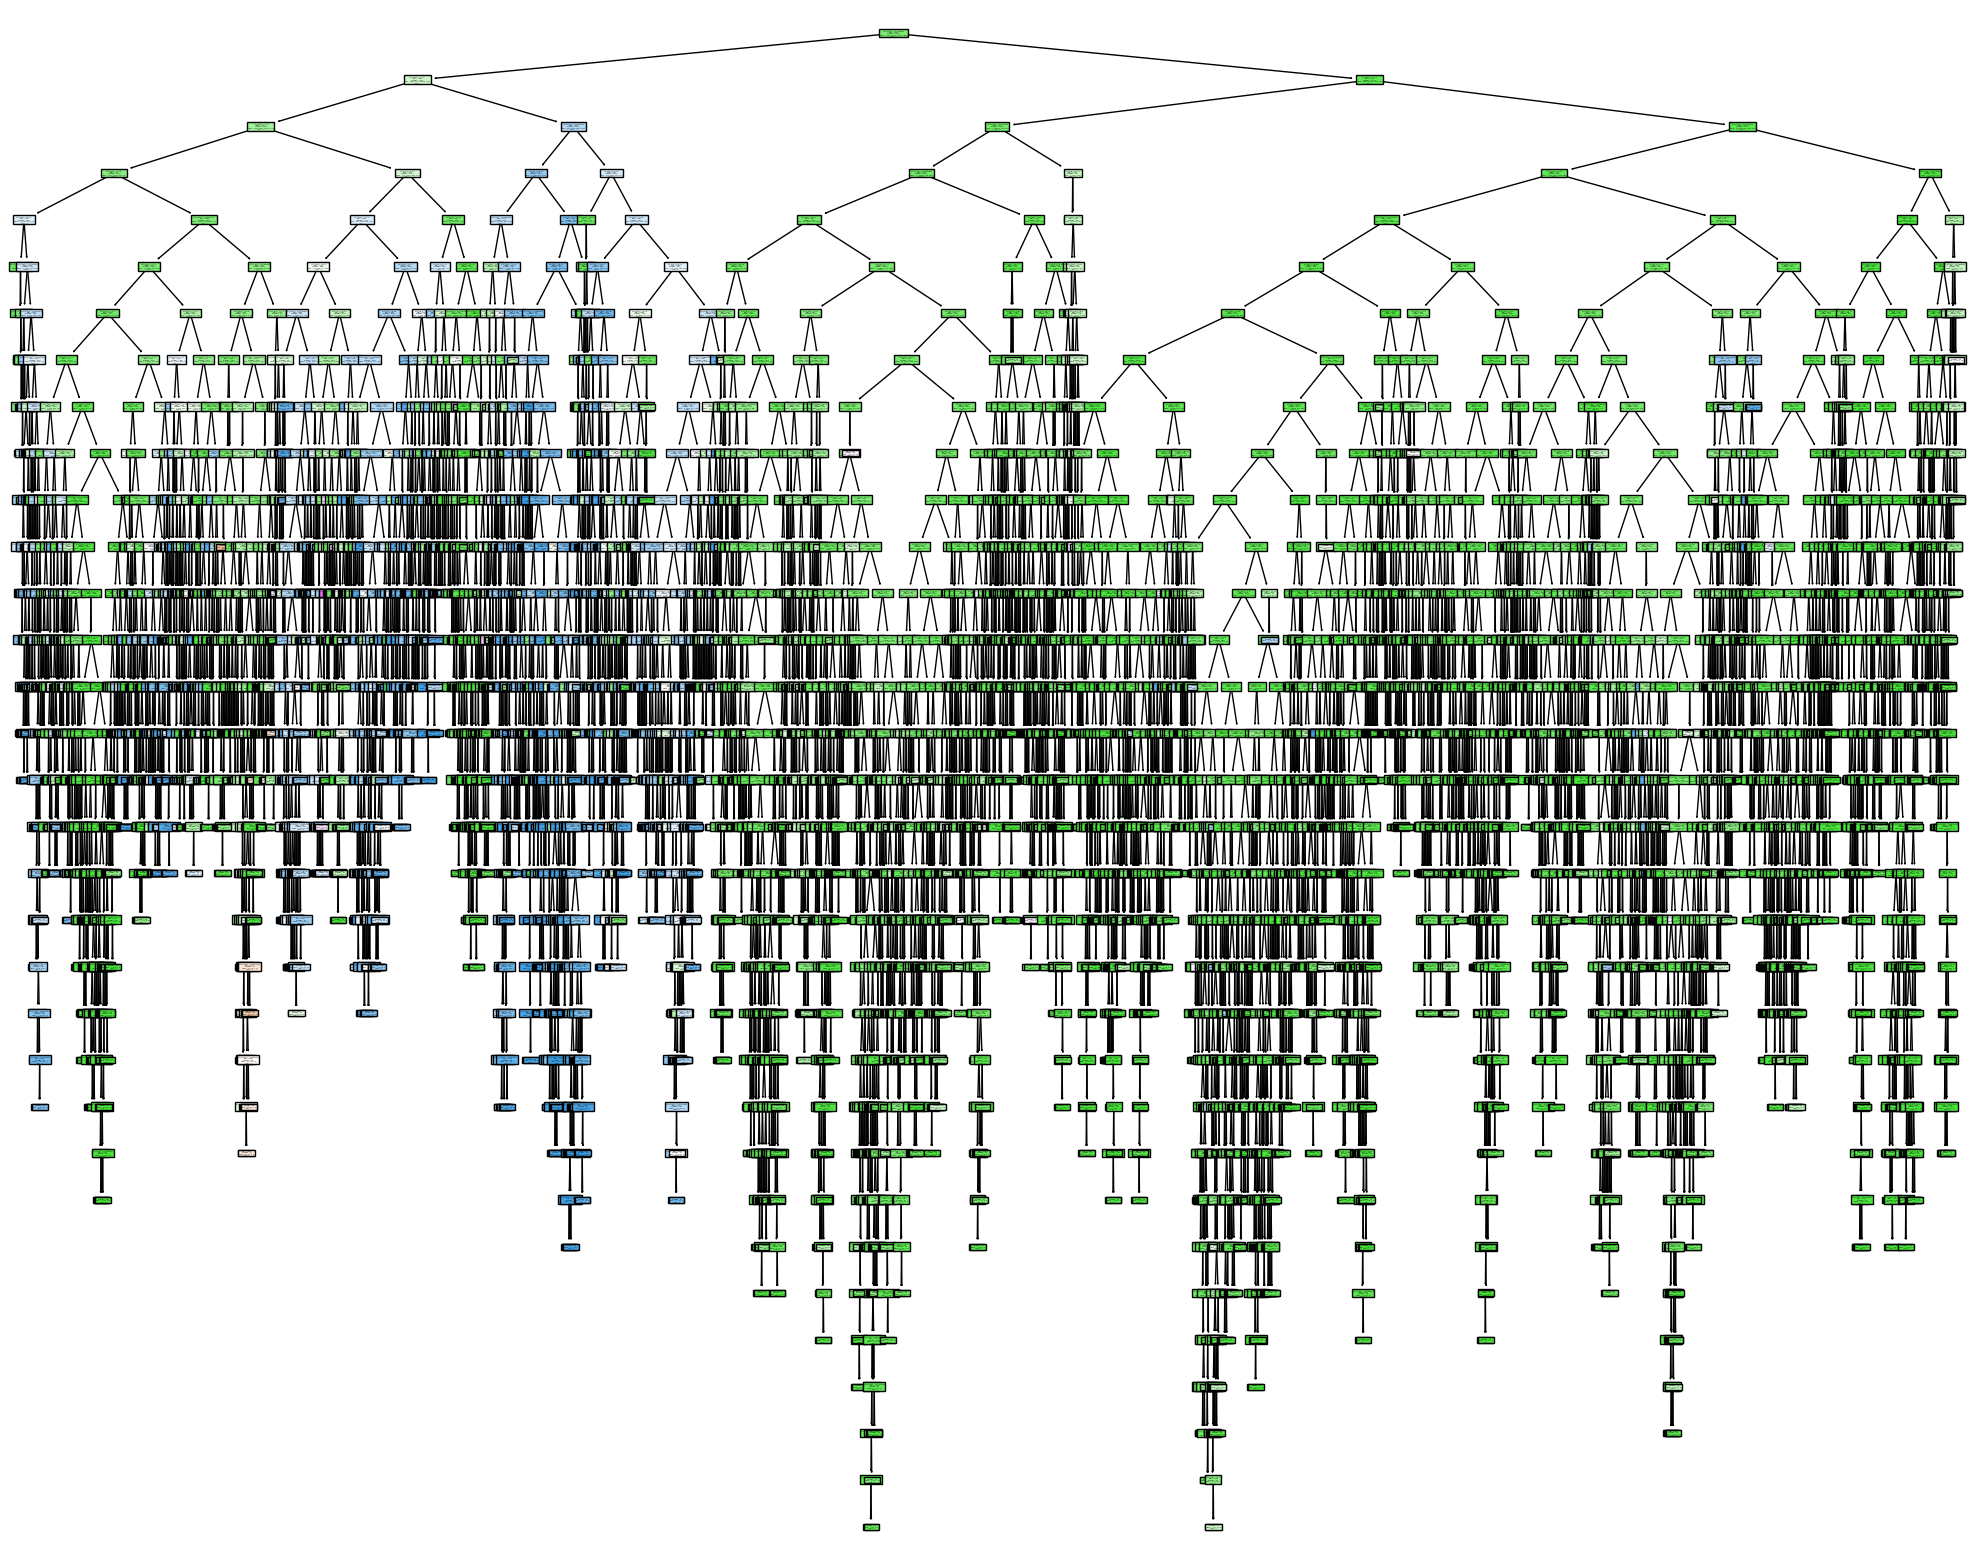

In [43]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(random_search2.best_estimator_, 
                   feature_names=X_train_important2.columns.tolist(),  
                   class_names=['1', '2', '3', '4'],
                   filled=True)

# Ignore Everything Below this Line

## 1.2 Distribution of Accident Severity

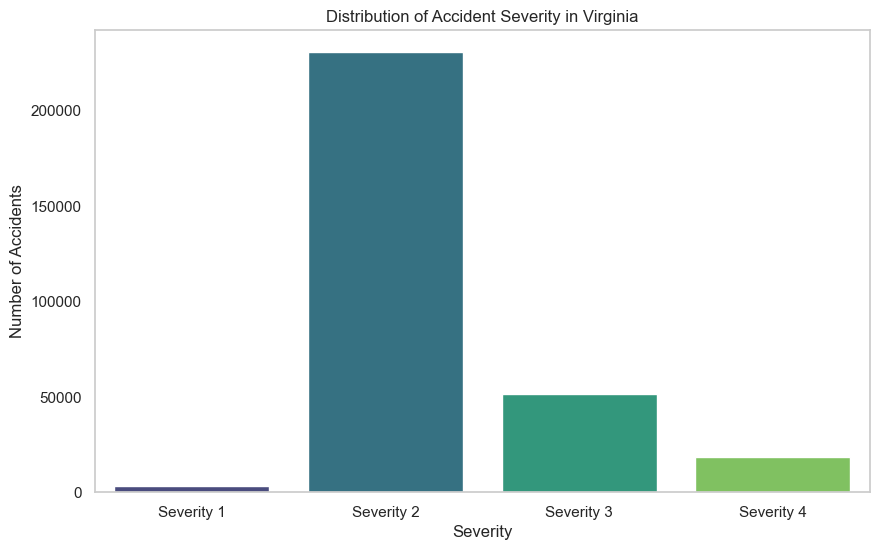

Severity
2    230660
3     51324
4     18202
1      3115
Name: count, dtype: int64

Severity
2    76.049865
3    16.921804
4     6.001299
1     1.027033
Name: count, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Plot the distribution of accident severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=data, palette='viridis')

plt.title('Distribution of Accident Severity in Virginia')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1, 2, 3], ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.grid(axis='y')

# Show the plot
plt.show()

# Calculate the percentage of each severity level
severity_counts = data['Severity'].value_counts()
severity_percentages = severity_counts / severity_counts.sum() * 100

display(severity_counts)
display(severity_percentages)

### Insights

* **Severity 2** accidents are the most common, accounting for approximately 76.05% of all accidents. This indicates that the majority of accidents have a moderate impact on traffic.
* **Severity 3** accidents make up about 16.92%, suggesting a more significant impact on traffic compared to Severity 2 but less than Severity 4.
* **Severity 4** accidents, which have the most substantial impact on traffic, constitute around 6% of the dataset.
* **Severity 1** accidents are the least common, making up only about 1.03% of the accidents. These are the accidents with the least impact on traffic.

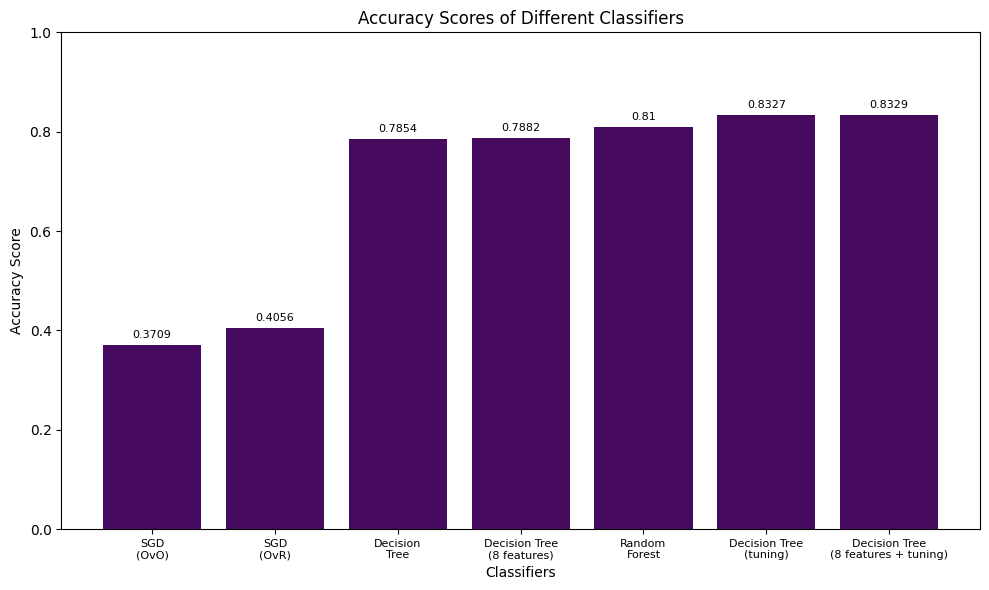

In [56]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Classifier names
classifiers = [
    'SGD\n(OvO)', 'SGD\n(OvR)', 'Decision\nTree', 'Decision Tree\n(8 features)',
    'Random\nForest', 'Decision Tree\n(tuning)', 'Decision Tree\n(8 features + tuning)'
]

# Corresponding accuracy scores
accuracy_scores = [0.3709, 0.4056, 0.7854, 0.7882, 0.81, 0.8327, 0.8329]

# Use Viridis color palette
colors = viridis(len(classifiers))

# Plotting the bar graph with Viridis color palette
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracy_scores, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy scores

# Rotate x-labels for better visibility
plt.xticks(rotation=0, ha='center', fontsize=8)

# Display the values on top of the bars
for bar, v in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, str(round(v, 4)),
             ha='center', va='bottom', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


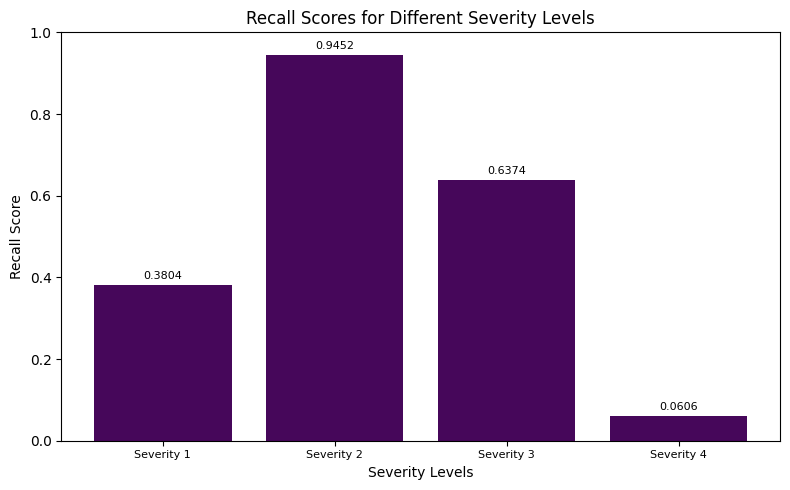

In [57]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Severity levels
severity_levels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

# Corresponding recall scores
recall_scores = [0.3804, 0.9452, 0.6374, 0.0606]

# Use Viridis color palette
colors = viridis(len(severity_levels))

# Plotting the bar graph with Viridis color palette
plt.figure(figsize=(8, 5))
bars = plt.bar(severity_levels, recall_scores, color=colors)
plt.xlabel('Severity Levels')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Different Severity Levels')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for recall scores

# Rotate x-labels for better visibility
plt.xticks(rotation=0, ha='center', fontsize=8)

# Display the values on top of the bars
for bar, v in zip(bars, recall_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, str(round(v, 4)),
             ha='center', va='bottom', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


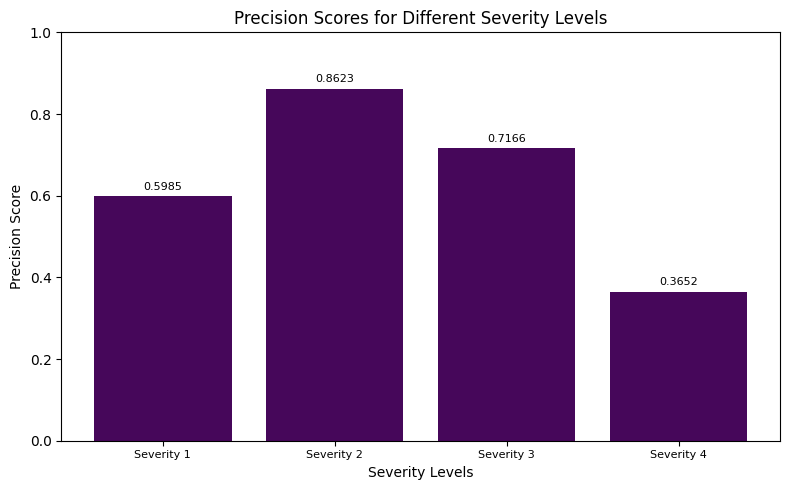

In [61]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Severity levels
severity_levels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

# Corresponding precision scores
precision_scores = [0.5985, 0.8623, 0.7166, 0.3652]

# Use Viridis color palette
colors = viridis(len(severity_levels))

# Plotting the bar graph with Viridis color palette
plt.figure(figsize=(8, 5))
bars = plt.bar(severity_levels, precision_scores, color=colors)
plt.xlabel('Severity Levels')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Severity Levels')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for precision scores

# Rotate x-labels for better visibility
plt.xticks(rotation=0, ha='center', fontsize=8)

# Display the values on top of the bars
for bar, v in zip(bars, precision_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, str(round(v, 4)),
             ha='center', va='bottom', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## 1.2 Geographical Analysis

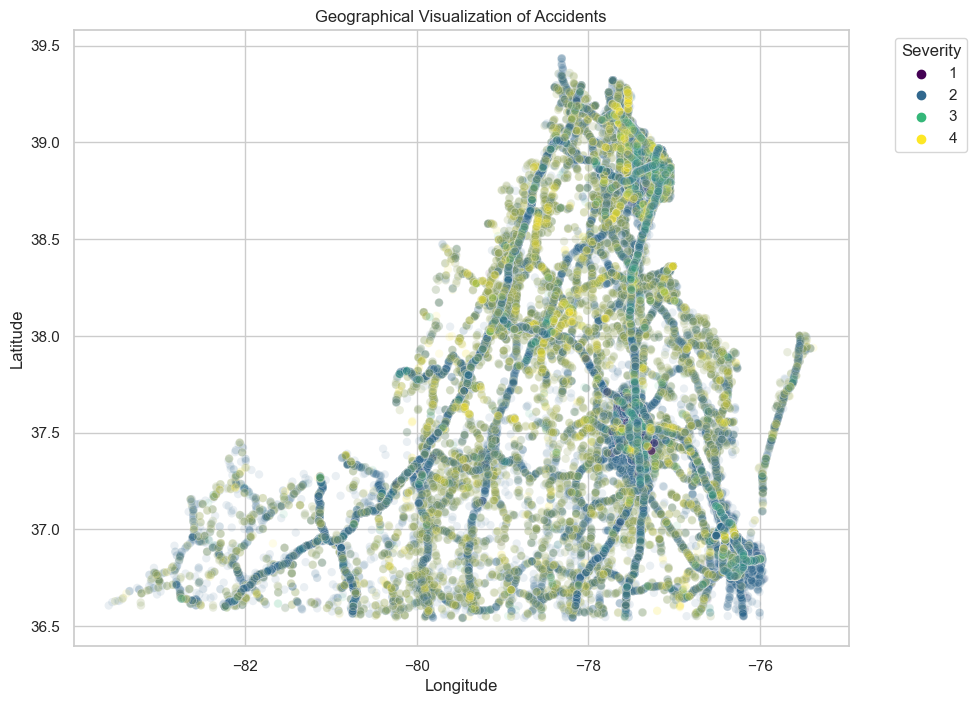

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Start_Lat and Start_Lng
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', sizes=(20, 200), palette='viridis', data=data, alpha=0.1, legend="full")

plt.title('Geographical Visualization of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Insights

* **Highway Clusters:** The clustering of severity 4 accidents along certain lines strongly suggests these are major highways. High-speed roads are often the sites of more severe accidents due to the higher speeds and the severity of collisions that can occur.
* **Urban Concentration:** The density of accidents appears to be higher in urban areas, likely due to higher traffic volumes and complex road networks.
* **Rural Accidents:** While less frequent, severe accidents do occur in rural areas, which could be due to factors such as higher speed limits, less frequent traffic enforcement, and longer emergency response times.

## 1.3 Temporal Analysis

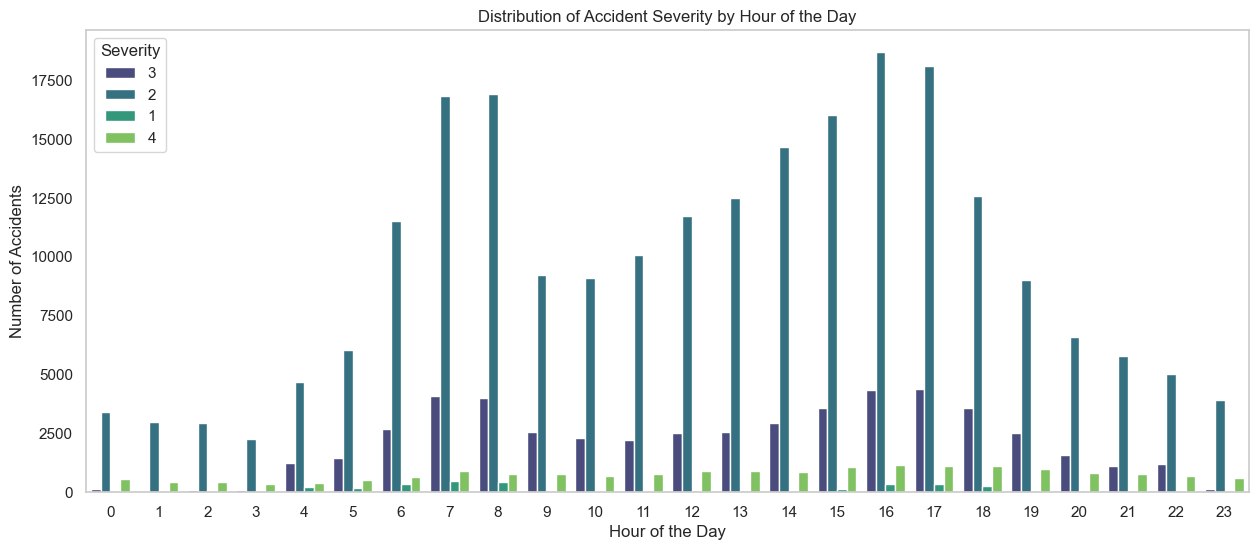

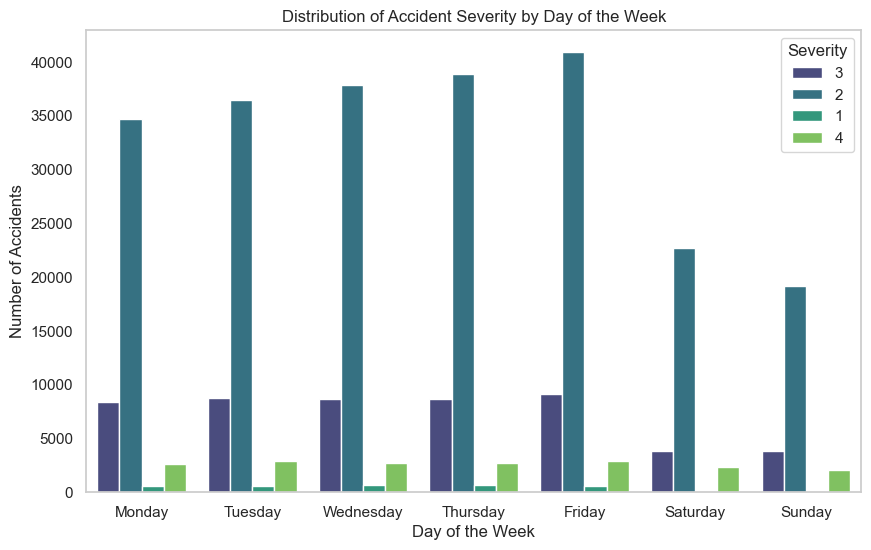

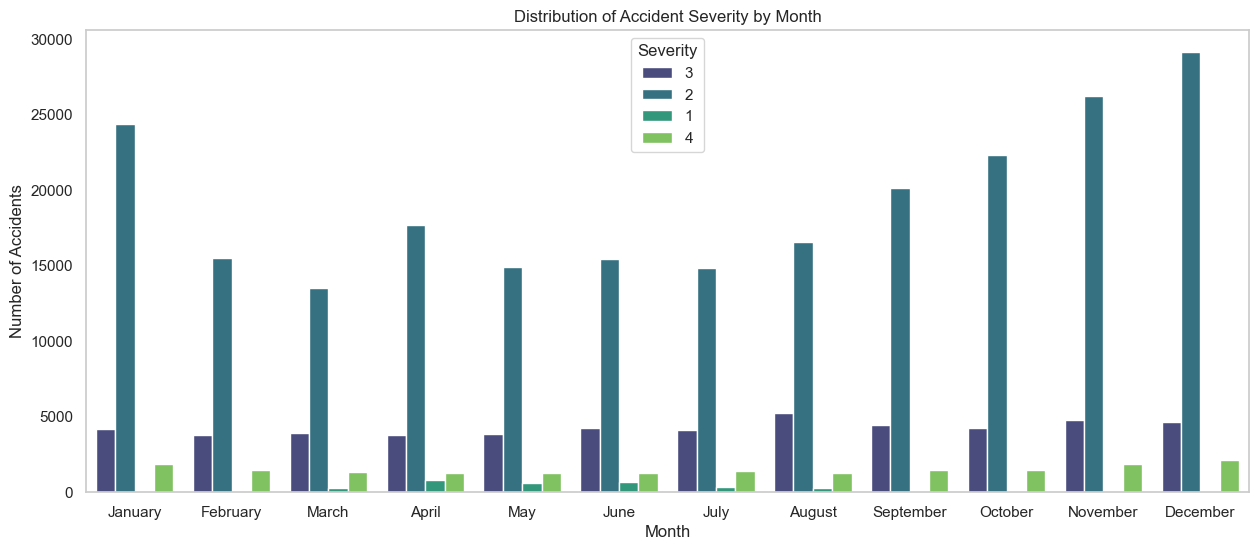

In [ ]:
# Convert Start_Time to datetime with mixed format handling
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='mixed')

# Extract hour, day of the week, and month from Start_Time
data['Hour'] = data['Start_Time'].dt.hour
data['Day'] = data['Start_Time'].dt.day_name()
data['Month'] = data['Start_Time'].dt.month_name()

# Check the first few rows to confirm the extraction
data[['Start_Time', 'Hour', 'Day', 'Month']].head()

# Convert 'Severity' to string type for plottingk
data['Severity'] = data['Severity'].astype(str)

# Plotting severity distribution across different hours of the day
plt.figure(figsize=(15, 6))
sns.countplot(x='Hour', hue='Severity', data=data, palette='viridis')
plt.title('Distribution of Accident Severity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', loc='upper left')
plt.grid(axis='y')
plt.show()

# Plotting severity distribution across different days of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', hue='Severity', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Accident Severity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.grid(axis='y')
plt.show()

# Plotting severity distribution across different months
plt.figure(figsize=(15, 6))
sns.countplot(x='Month', hue='Severity', data=data, palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Accident Severity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.grid(axis='y')
plt.show()

### Insights

**Hour of the Day**

* **Peak Hours:** The highest number of accidents, especially those of Severity 2 and 3, occur during peak traffic hours, specifically around 7-8 AM and 4-6 PM. This aligns with typical rush hour periods when traffic volume is high.
* **Late Night and Early Morning:** Severity 4 accidents, which have the most significant impact on traffic, are more evenly distributed throughout the day, with a notable increase during late night and early morning hours (0-4 AM).
* **Afternoon:** The afternoon hours (particularly from 2 PM to 5 PM) also see a higher number of accidents across all severity levels.

**Day of the Week**

* **Weekdays:** A higher frequency of accidents is observed on weekdays, with Friday having the highest number. Severity 2 and 3 accidents are more common on weekdays, which might be due to increased commuting and commercial traffic.
* **Weekends:** Saturday and Sunday show a noticeable decrease in the number of accidents. However, the proportion of Severity 4 accidents is higher during the weekends compared to weekdays.

**Month**

* **Winter Months (December, January, February):** There's a significant increase in accidents during these months, particularly for Severity 2 accidents. This might be due to adverse weather conditions like snow and ice, which are common in Virginia during winter.
* **Spring and Summer Months (April to July):** The number of accidents tends to decrease during these months, but there is a notable increase in Severity 3 and 4 accidents in June and July.

**Numerical Statistics**

* **Hourly Statistics:** The number of accidents varies significantly throughout the day, with peak hours showing the highest frequency.
* **Daily Statistics:** Weekdays have higher overall accident numbers compared to weekends.
* **Monthly Statistics:** Seasonal variations are evident, with winter months showing a spike in accident frequency, particularly for less severe accidents.